In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

# Introduction:

When trying to determine which neighborhood is "best" in a city as diverse as Pittsburgh, many factors come to mind. For our group, some of the first metrics we came up with included more "exterior" elements, such as the housing and overall aesthetics a neighborhood provides. But when thinking about the most important factors needed in Pittsburgh, transportation was near the top of the list — and for good reason. For many in the region, walking isn't a reasonable option of transportation to many places, such as their workplace or shopping centers. To figure out which neighborhood has the best general "transportation", we looked into three different aspects revolving around the streets of Pittsburgh. 

# The Metric:

Taking each of these submetrics into account and how they connect, accessibility of transport is a great way to describe them, and is our "Main Metric". More bike lanes mean bikes are more accessible, and less traffic and more affordable parking make cars more accessible. 

In order to work out which neighborhood has the best accessibility of transport, we analyzed the following three categories: bikeability, drivability, and parking availability. To do this, we took data from different posts on the Western Pennsylvania Regional Data Center, being the bike lanes and sharrows installed since the 1980s, The time and cost of parking meters in different neighborhoods, and the traffic data in Pittsburgh. These submetrics reflect different modes of getting around in the city — ranging from cycling in bike lanes, driving through morning and afternoon traffic, and searching for a parking spot, both at and away from home. Taking all of these factors into account, we attempted to determine the accessibility, convenience, and all-around quality of everyday transportation in each neighborhood. 

# The Best Neighborhood:
To analyze which neighborhood is the best in Pittsburgh, we used the metric and submetrics from the previous section. After taking them all into account, the best neighborhood topped each list rarely, 


# Bikeability

To estimate the bikeability of the neighborhoods in Pittsburgh, as previously mentioned, I used a data set identifying the bike lanes installed since the 1980s. Although the list came with a few more identifiers, such as total road length, I believe that the general number of roads is more important. For example, a neighborhood could be rated higher for having a long, straight road as opposed to a neighborhood that has smaller, but overall more expansive roads. The main issue that I ran into while analyzing this is that there isn't actually a neighborhood stated for the rows, only providing the street and cross streets. Therefore, I used an open-source project called "OpenStreetMap" to determine which neighborhood each road was in. 

In [ ]:
def get_pittsburgh_neighborhood(query):
    url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": f"{query}, Pittsburgh, PA",
        "format": "json",
        "addressdetails": 1,
        "limit": 1
    }

To make it more accurate, It also attempts to take the cross-streets provided to provide a more accurate section of the road to analyze

In [ ]:
bad_terms = {"loop", "various", "through", "park", "trail", "path"}
    use_cross = cross and all(term not in cross.lower() for term in bad_terms)

neighborhood = get_pittsburgh_neighborhood(query)
if not neighborhood and use_cross:
        print(f"Fallback to just street: {street}")
        neighborhood = get_pittsburgh_neighborhood(street)

In [4]:
summary_loaded = pd.read_csv("neighborhood_bike_lane_counts.csv")
print("\nNeighborhood Bike Lane Counts:")
print(summary_loaded.sort_values(by="Bike Lanes", ascending=False).to_string(index=False))


Neighborhood Bike Lane Counts:
                    Neighborhood  Bike Lanes
                      Bloomfield          16
             Squirrel Hill South          14
                    East Liberty           8
                     Perry North           7
                   Highland Park           6
             Lower Lawrenceville           6
                       Shadyside           5
                   South Oakland           5
                         Oakland           5
              Marshall-Shadeland           4
                    Point Breeze           4
               Cultural District           3
                  East Allegheny           3
                     North Shore           3
                Allegheny Center           3
Schenley Farms Historic District           3
                     Polish Hill           3
                South Side Flats           2
                        Homewood           2
                       Hazelwood           2
                       

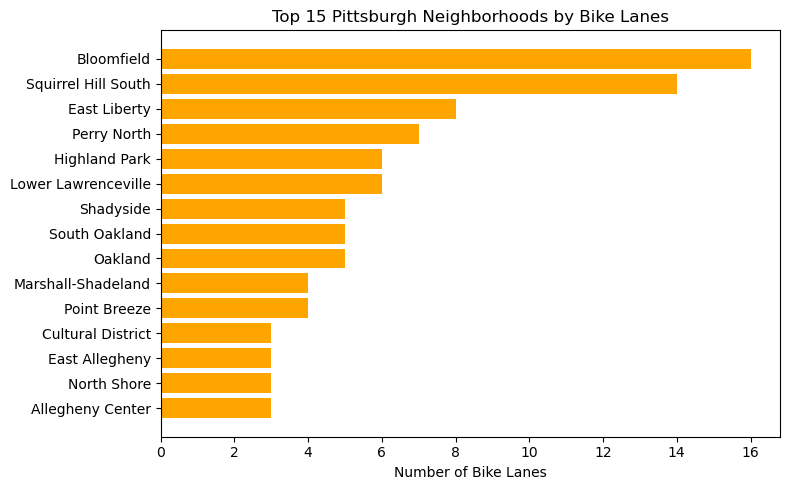

In [12]:
df = pd.read_csv("Ryan Fiorentini Personal Notebook/neighborhood_bike_lane_counts.csv")

# Sorts by descending bike lane count
df_sorted = df.sort_values(by="Bike Lanes", ascending=False)

top_df = df_sorted.head(15)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(top_df["Neighborhood"], top_df["Bike Lanes"], color="orange")
plt.xlabel("Number of Bike Lanes")
plt.title(f"Top {15} Pittsburgh Neighborhoods by Bike Lanes")
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()

The graph above shows that the neighborhoods with the more bike lanes/sharrows are by far Bloomfield and Squirrel Hill South. Despite how it looks, each of these are in the top 20-30% of neighborhoods. The winners might be clear when isolated, but not when factoring in the other submetrics. 

# Parking

- By using the two main points that people consider when parking at metered areas, parking time limit and the cost. Comparing these was difficult since some areas had a low price but short time limit, there was a tradeoff. Low prices don't automatically mean that its better even if the time is short.
- To include both points fairly I used a parking score. By dividing the parking time limit by the cost per hour. The higher the score the better the parking in that area is.

In [3]:
# Sort the data to view only the area, rates, and parkinglen
data_sorted = data.sort_values(["rates", "parkinglen"], ascending = [True, True])
data_sorted[["area", "rates", "parkinglen"]]

,area,rates,parkinglen
3,Mount Washington,$1.00,10 Hours
19,Allentown,$1.00,2 Hours
20,West End,$1.00,2 Hours
22,Knoxville,$1.00,2 Hours
24,Carrick,$1.00,2 Hours
0,North Side,$1.50,10 Hours
4,South Side,$1.50,10 Hours
5,Uptown,$1.50,10 Hours
6,Brookline,$1.50,10 Hours
8,Shadyside,$1.50,10 Hours


In [4]:
# This block of code is to read each row and only take out the numbers and convert to float to be able to do calculations for parking score
# iterate through each row in the data, converting each string to float from the rates, and parkinglen columns
for index, row in copy_of_data.iterrows():
    # store each string in the rates column
    rate = row["rates"]
    # if the column contains the string then a new float will be used
    if rate == "Dynamic":
        new_rate = 2.0
    # if string is not "Dynamic" then split the string and only take the number part
    else:
        new_rate = float(rate.split("$")[1])
    # add the new values to the empty list
    new_rates.append(new_rate)

    # store the current rows parking length
    parking = row["parkinglen"]
    # if the current rows string is "Unlimited" then replace with float
    if parking == "Unlimited":
        new_parking = 24.0
    # split the string and only take the number, convert into float
    else:
        new_parking = float(parking.split()[0])
    # add the new values to the empty parkinglen list
    new_parkinglen.append(new_parking)

# set the old string rates to the new list with the floats
copy_of_data["rates"] = new_rates
copy_of_data["parkinglen"] = new_parkinglen

# now math operations can be performed since they are now floats, parking score to determine the best parking area
copy_of_data["parkingScore"] = copy_of_data["parkinglen"] / copy_of_data["rates"]
sort_parkingScore = copy_of_data.sort_values("parkingScore", ascending = False)
sort_parkingScore[["area", "parkinglen", "rates", "parkingScore"]]


,area,parkinglen,rates,parkingScore
23,Bakery Square,24.0,2.0,12.000000
3,Mount Washington,10.0,1.0,10.000000
1,North Shore,24.0,3.0,8.000000
9,Oakland,24.0,3.0,8.000000
0,North Side,10.0,1.5,6.666667
8,Shadyside,10.0,1.5,6.666667
6,Brookline,10.0,1.5,6.666667
4,South Side,10.0,1.5,6.666667
5,Uptown,10.0,1.5,6.666667
14,Bloomfield,10.0,1.5,6.666667


### Parking Score

- From this sorted data above based on the highest parking score, it is easy to tell that Bakery Square has the highest parking score with a rate of $2 and max parking length of 24 hours.

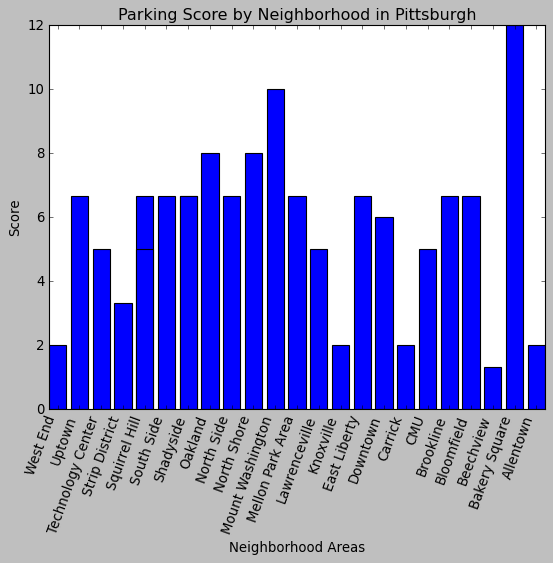

In [51]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# this code is for displaying the bar chart
areas_parkingScore = copy_of_data.sort_values(["area", "parkingScore"], ascending = False)
plt.bar(areas_parkingScore["area"], areas_parkingScore["parkingScore"])
plt.title("Parking Score by Neighborhood in Pittsburgh")
plt.xlabel("Neighborhood Areas")
plt.ylabel("Score")
plt.style.use("fast")
plt.xticks(rotation = 70, ha = "right");

The neighborhood with the highest parking score is Bakery Square, shown by the bar graph above. You can easily tell by the graph the neighborhood with the highest score. Meaning the neighborhood has good cost and time limit. The other top 4 are Mount Washington, Oakland, and North Shore. 

# Traffic

In the dataset itself, there's a total of 420 trackers that Pittburgh tried to use to enumerate the amount of cars and/or bicycles. However, not all of the traffic counters actually shown data on the amount of cars, so they won't be included in the analysis. To determine the neighborhood that's the easiest to travel in according to traffic amounts, I'll be using the column that has the neighborhood's name on it, in which multiple trackers might have been placed in the same neighborhood.

In [1]:
import pandas as pd
print("Here's the first few elements to give an example of what the chart shows.")

traffic = pd.read_csv("traffic.tsv", sep="\t")
traffic.head()

Here's the first few elements to give an example of what the chart shows.


,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,2,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,3,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,5,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


In [2]:
print("Here's the first ten elements with data in the average_daily_car_traffic column via query mask.")
query_traffic = traffic['average_daily_car_traffic'] >= 0.1
traffData = traffic[query_traffic]
traffData.head(10)

Here's the first ten elements with data in the average_daily_car_traffic column via query mask.


,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
3,4,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
5,6,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,...,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
7,8,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,...,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
10,11,1102260248,8,1.088318e+09,2018-07-16,2018-08-01,5592.0,NaN,NaN,StatTrak,...,-79.911925,40.435620,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-21
13,14,1130122192,65,1.341476e+09,2019-02-05,2019-02-14,1455.0,NaN,NaN,StatTrak,...,-79.979554,40.436482,Bluff,6.0,1.0,42003010300,3.0,1.0,2.0,2-1
14,15,115502120,176,1.215643e+09,2019-08-09,2019-08-19,11500.0,NaN,5,StatTrak,...,-80.052403,40.451926,Crafton Heights,2.0,20.0,42003281400,5.0,20.0,6.0,1-16
15,16,1155507145,72,1.207664e+09,2019-02-14,2019-02-21,6793.0,NaN,1,StatTrak,...,-79.943745,40.452709,Shadyside,8.0,7.0,42003070900,2.0,7.0,4.0,3-22
17,18,1158858353,36,1.131387e+09,2018-06-25,2018-07-12,7688.0,NaN,NaN,StatTrak,...,-79.923316,40.478161,Highland Park,7.0,11.0,42003110200,2.0,11.0,5.0,3-9
18,19,1159852619,118,1.024536e+09,2019-07-09,2019-07-12,10350.0,NaN,12,StatTrak,...,-80.001937,40.447849,North Shore,1.0,22.0,42003563200,6.0,22.0,1.0,1-20


In [5]:
print("This is the first ten trackers in a sorted chart with increasing numbers from the average_daily_car_traffic column")
traffDataSorted = traffData.sort_values(by='average_daily_car_traffic')
traffDataSorted.head(10)

This is the first ten trackers in a sorted chart with increasing numbers from the average_daily_car_traffic column


,_id,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
182,183,856876185,77,6.759613e+08,2019-03-22,2019-03-31,23.0,NaN,3,StatTrak,...,-80.012946,40.456612,Central Northside,1.0,22.0,42003220600,1.0,22.0,1.0,1-21
251,474,1271744444,269,9.035092e+08,2020-09-24,2020-10-02,58.0,NaN,#6,StatTrak,...,-79.922844,40.468838,East Liberty,9.0,11.0,42003111300,2.0,11.0,5.0,3-8
307,727,938946316,326,2.249990e+08,2020-11-19,2020-12-02,63.0,NaN,4,StatTrak,...,-79.997312,40.464395,Spring Hill-City View,1.0,24.0,42003262000,1.0,24.0,1.0,1-24
247,470,950865722,265,1.160608e+09,2020-09-16,2020-09-24,77.0,NaN,#2,StatTrak,...,-79.948895,40.465446,Bloomfield,7.0,9.0,42003090300,2.0,9.0,5.0,3-6
258,481,550216999,276,8.605089e+08,2020-07-06,2020-07-15,79.0,NaN,NaN,StatTrak,...,-79.921974,40.470257,Highland Park,7.0,11.0,42003110200,2.0,11.0,5.0,3-9
244,467,799096979,262,1.169829e+09,2020-09-04,2020-09-11,79.0,NaN,#5,StatTrak,...,-79.946953,40.465129,Bloomfield,7.0,8.0,42003080900,2.0,8.0,5.0,3-6
321,794,179318306,340,1.151539e+09,2021-01-08,2021-01-16,109.0,NaN,5,StatTrak,...,-80.026536,40.474191,Marshall-Shadeland,1.0,27.0,42003271500,1.0,27.0,1.0,1-14
310,730,614417587,329,1.406278e+09,2020-12-03,2020-12-11,115.0,NaN,1,StatTrak,...,-79.981096,40.431002,South Side Flats,3.0,17.0,42003170200,3.0,17.0,3.0,4-24
318,763,1844854594,337,3.703447e+07,2020-12-15,2020-12-23,126.0,NaN,3,StatTrak,...,-79.915459,40.372514,Lincoln Place,5.0,31.0,42003310200,3.0,31.0,4.0,4-20
158,159,615223154,175,1.247631e+09,2019-08-09,2019-08-19,131.0,NaN,4,StatTrak,...,-80.073656,40.456401,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16


It seems that Central Northside, East Liberty, and Spring Hill-City have strong cases with being the easiest transportation neighborhoods. However, recall that multiple trackers can exist in the same neighborhood. I'll try sorting the total average_daily_car_traffic using a dictionary.

In [14]:
car_count = dict()
lowest = 'temp'
car_count[lowest] = 100000
for index, row in traffData.iterrows():
    neighborhood = row['neighborhood']
    cars = row['average_daily_car_traffic']
    if neighborhood not in car_count:
        car_count[neighborhood] = cars
    else:
        car_count[neighborhood] = car_count[neighborhood] + cars
    if car_count[neighborhood] < car_count[lowest]:
        lowest = neighborhood
car_count.pop('temp')
sorted_cars = {k: v for k, v in sorted(car_count.items(), key=lambda item: item[1])}
print(sorted_cars)

{'South Side Flats': 115.0, 'Lincoln Place': 126.0, 'Lincoln-Lemington-Belmar': 195.0, 'Fineview': 419.0, 'Allegheny West': 477.0, 'New Homestead': 666.0, 'Overbrook': 777.0, 'Summer Hill': 937.0, 'Spring Garden': 1226.0, 'Beltzhoover': 1577.0, 'East Allegheny': 1924.0, 'Central Business District': 2305.0, 'Allegheny Center': 2386.0, 'St. Clair': 2436.0, 'Chartiers City': 2571.0, 'Hazelwood': 2579.0, 'West Oakland': 2585.0, 'Spring Hill-City View': 2586.0, 'Upper Hill': 2860.0, 'Windgap': 3062.0, 'Lower Lawrenceville': 3472.0, 'Elliott': 4028.0, nan: 4184.0, 'Beechview': 4255.0, 'Arlington': 4571.0, 'Friendship': 4887.0, 'Bluff': 5365.0, 'Duquesne Heights': 5831.0, 'Central Northside': 5945.0, 'Homewood North': 7027.0, 'Greenfield': 7158.0, 'Brighton Heights': 7547.0, 'Knoxville': 7646.0, 'Sheraden': 8532.0, 'Point Breeze North': 9928.0, 'North Shore': 10350.0, 'Central Oakland': 11306.0, 'Crafton Heights': 11500.0, 'Perry South': 12075.0, 'Central Lawrenceville': 13499.0, 'Carrick': 1

My reasoning ended up being effective, as the three neighborhoods I mentioned in the above comment ended up being completely different than the three neighborhoods that actually had the least recorded average_daily_car_traffic number. According to the dictionary, South Side Flats, Lincoln Place, and Lincoln-Lemington-Belmar holds the least recorded cars per day.

# Results:

Wrapping all the submetrics into a single ranking wasn't as straightforward as expected, since no single neighborhood dominated across all categories. However, Oakland and North Shore emerged as top contenders. Oakland leads in bikeability, with five bike-accessible streets compared to North Shore’s three, and both neighborhoods share an impressive parking score of 8.0. While North Shore trails slightly in bike accessibility, it makes up for it with notably lower traffic — averaging around 1,000 fewer cars daily than Oakland. Taking all these factors into account, the edge goes to North Shore as the best neighborhood in Pittsburgh, striking the strongest overall balance between accessibility and convenience.

# Conclusions: 

Astor: It was a close call between a few neighborhoods, and although South Side Flats ended up on top as the neighborhood with the least traffic, at a daily 115 cars, North Shore was the one with the overall best transportation. I must disclose something, however, as the dataset I chose is not up to date, due to a broken data feed since 2021. Because of this, the data might be inaccurate. The instructions requests me to compare this to my favorite neighborhood. The only neighborhood I recognize in the short time I've been at college is Shadyside, which I'm not surprised to see as the second most traffic-heavy neighborhood. This is my best attempt to find the best neighborhood for transportation.

Austin: In conclusion, after the data-driven determination of "best neighborhood" my personal favorite neighborhood did not have the best parking score. As my personal favorite was not backed by real data. This project helped me realize how important it is to be able to use real world data to support your idea of something. Giving a more fact based answer than a guess or opinion.

Ryan: I wouldn't say that North Shore is my favorite neighborhood, but for me it is pretty high up on the list. If i had to choose my favorite neighborhood, I'd say either Squirrel Hill or Oakland since there is so much to do there. I think that my favorites are  more suited for overall things to do, since my favorites have cheap and free things to do while the main attractions of North Shore are more event based, since it is where PNC Park, Acrisure Stadium, and the Carnegie Science Center is. 